# Red wine Quality Prediction

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine.This dataset can be viewed as classification task. The classes are ordered and not balanced.In the dataset we have 11 inputs columns.

# Important Liabraries

In [342]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')


In [328]:
df = pd.read_csv("wine_equality.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [217]:
df.shape

(1599, 12)

We have 1599 rows and 12 columns.

In [218]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

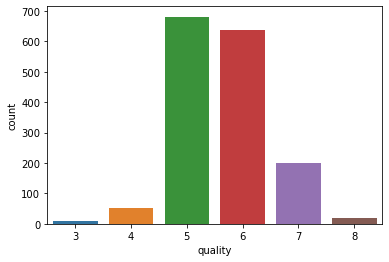

In [219]:
sns.countplot(x="quality",data=df)
plt.show()

The classes are ordered and not balanced

In [220]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing value in the dataset

In [221]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

We have float and integer type of data.

In [222]:
def good_or_bad(num):
    if num>6:
        return 1
    else:
        return 0

function for find out good or bad quality.if the quality is greater than 7 it is good quality otherwise bad.

In [223]:
df["quality"]

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [224]:
df["quality"]=list(map(good_or_bad,df["quality"]))

I used map function for maping the output list

In [225]:
df["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In this we can see that data imbalancing so need to solve it. 1==good quality and 0==bad

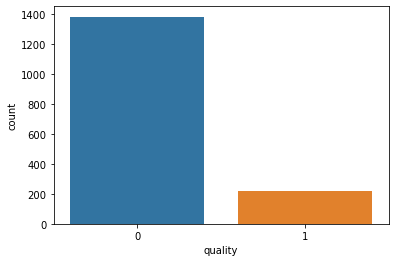

In [226]:
sns.countplot(x="quality",data=df)
plt.show()

With the help of countplot we can see the data imbalance issue. 1 is represent that good quality and 0 is not good.In this graph we can see that bad quality is higher than the good one.

In [227]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


Through the above table we can see that mean and max has huge differents almost columns so outlier is presented in those columns.Mean and median(50%) has shown slit differents so skewness also present or need to check skewness.

In [228]:
# functions for detecting outlier(3 std)
def outlier_det(data_frame,feature_name):
    lower_limit=data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_limit=data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    return (lower_limit,upper_limit)

In [229]:
def plts(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.boxplot(data_frame[feature_name])
    plt.subplot(1,2,2)
    sns.distplot(data_frame[feature_name])
    plt.title("original_dist")
    print("skewness:",data_frame[feature_name].skew())

function for boxplot and distplot

# Outlier detecting

skewness: 0.9827514413284587


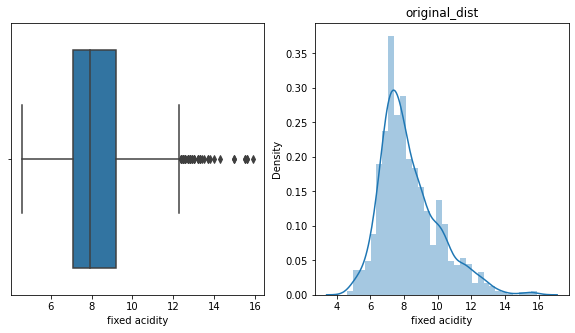

In [231]:
plts(df,"fixed acidity")

In the boxplot we can see that outliers and positive skewness also can see in the distplot.The skewness of fixed acidity is 0.98

In [232]:
outlier_det(df,"fixed acidity")

(3.096348318912736, 13.54292622767894)

Lower limit is 3.096 and upper limit is 13.54

In [233]:
df[(df["fixed acidity"]<3.096)|(df["fixed acidity"]>13.54)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,1
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,1
347,13.8,0.490,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,0
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8,0
381,13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.00140,3.06,0.80,10.0,0
391,13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.00140,3.06,0.80,10.0,0
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,1
544,14.3,0.310,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,0
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,0
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,0


These are the outliers

skewness: 0.6715925723840199


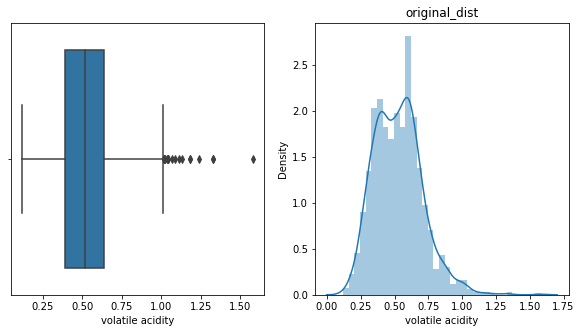

In [234]:
plts(df,"volatile acidity" )

can see outlier and skewness. skewness=0.67

In [235]:
outlier_det(df,"volatile acidity")

(-0.00935859964009178, 1.064999625281118)

lower limit = -0.00 & upper limit=1.06

In [236]:
df[(df["volatile acidity"]<-0.00)|(df["volatile acidity"]>1.06)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,0
120,7.3,1.070,0.09,1.70,0.178,10.0,89.0,0.99620,3.30,0.57,9.0,0
126,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,0
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,0
199,6.9,1.090,0.06,2.10,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,0
672,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,0
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,0
724,7.5,1.115,0.10,3.10,0.086,5.0,12.0,0.99580,3.54,0.60,11.2,0
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,0
1312,8.0,1.180,0.21,1.90,0.083,14.0,41.0,0.99532,3.34,0.47,10.5,0


skewness: 0.3183372952546368


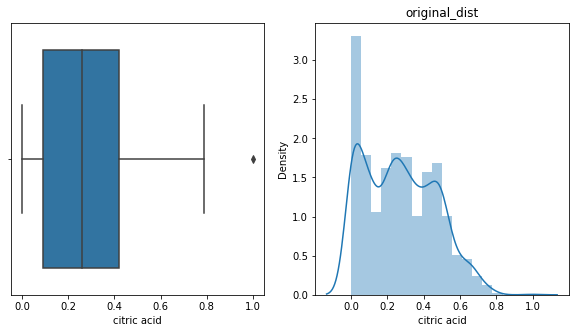

In [237]:
plts(df,"citric acid" )

only one outlier can see in the boxplot . 

In [238]:
outlier_det(df,"citric acid")

(-0.3134278024598572, 0.8553790219720501)

lower_limit=-0.31 & upper_limit=0.85

In [239]:
df[(df["citric acid"]<-0.31)|(df["citric acid"]>0.855)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,0


skewness: 4.54065542590319


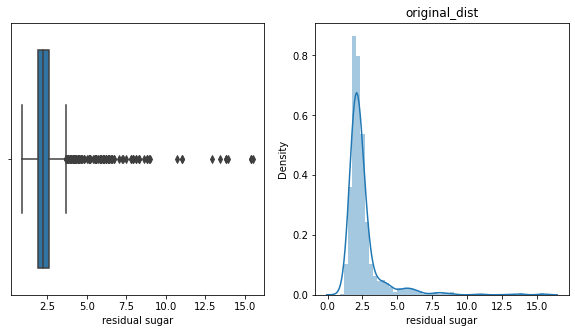

In [240]:
plts(df,"residual sugar")

high number of outlier can see in the boxplot,it's +ve skewed and not normally distributed

In [241]:
outlier_det(df,"residual sugar")

(-1.6909786750821896, 6.768589681961493)

lower_limit=-1.69 & upper_limit = 6.76

In [242]:
df[(df["residual sugar"]<-1.69)|(df["residual sugar"]>6.768)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,0
163,7.4,0.600,0.26,7.3,0.070,36.0,121.0,0.99820,3.37,0.49,9.4,0
164,7.3,0.590,0.26,7.2,0.070,35.0,121.0,0.99810,3.37,0.49,9.4,0
274,7.5,0.650,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4,0
324,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,0
325,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,0
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,0
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,0
480,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,0
494,6.5,0.390,0.23,8.3,0.051,28.0,91.0,0.99520,3.44,0.55,12.1,0


many number of rows has outlier

skewness: 5.680346571971724


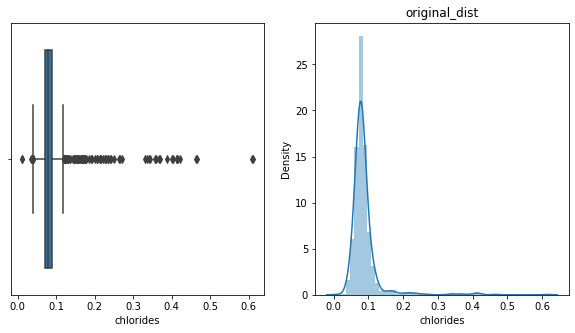

In [243]:
plts(df,"chlorides")

here we can see outlier present in many times and skewness also can see in the disribution plot

In [244]:
outlier_det(df,"chlorides")

(-0.053729364441777894, 0.22866244761876303)

lower limit = -0.05 & upper limit = 0.22.high number of outlier present

In [245]:
df[(df["chlorides"]<-0.05)|(df["chlorides"]>0.22)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,0
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,0
42,7.5,0.490,0.20,2.6,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,0
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,0
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,0
106,7.8,0.410,0.68,1.7,0.467,18.0,69.0,0.99730,3.08,1.31,9.3,0
147,7.6,0.490,0.26,1.6,0.236,10.0,88.0,0.99680,3.11,0.80,9.3,0
151,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,0
169,7.5,0.705,0.24,1.8,0.360,15.0,63.0,0.99640,3.00,1.59,9.5,0
181,8.9,0.610,0.49,2.0,0.270,23.0,110.0,0.99720,3.12,1.02,9.3,0


skewness: 1.250567293314441


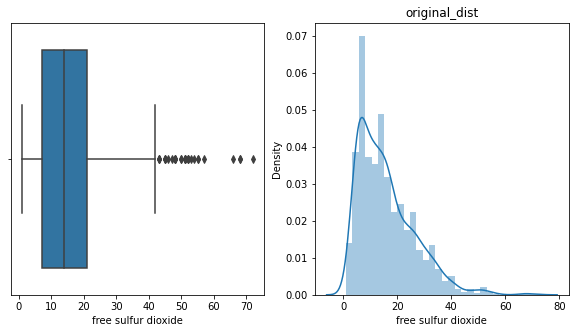

In [246]:
plts(df,"free sulfur dioxide")

In [247]:
outlier_det(df,"free sulfur dioxide")

(-15.505549083287853, 47.25539273557053)

In [248]:
df[(df["free sulfur dioxide"]<-15.5)|(df["free sulfur dioxide"]>47.25)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,0
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,0
57,7.5,0.630,0.12,5.1,0.111,50.0,110.0,0.99830,3.26,0.77,9.4,0
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,0
400,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,0
584,11.8,0.330,0.49,3.4,0.093,54.0,80.0,1.00020,3.30,0.76,10.7,1
925,8.6,0.220,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,1
926,9.4,0.240,0.33,2.3,0.061,52.0,73.0,0.99786,3.47,0.90,10.2,0
982,7.3,0.520,0.32,2.1,0.070,51.0,70.0,0.99418,3.34,0.82,12.9,0
1131,5.9,0.190,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,0


skewness: 1.515531257594554


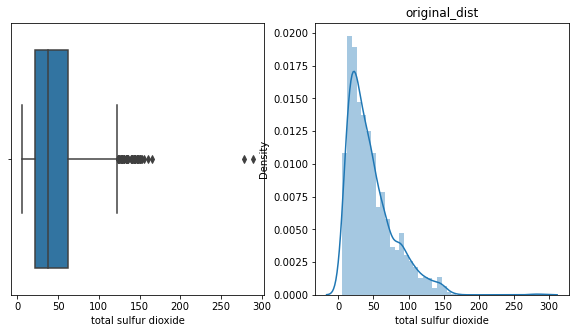

In [249]:
plts(df,"total sulfur dioxide")

In [250]:
outlier_det(df,"total sulfur dioxide")

(-52.21818106466563, 145.15376580512842)

In [251]:
df[(df["total sulfur dioxide"]<-52.21)|(df["total sulfur dioxide"]>145.153)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,0
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,0
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,0
515,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,0
591,6.6,0.390,0.49,1.7,0.070,23.0,149.0,0.99220,3.12,0.50,11.5,0
636,9.6,0.880,0.28,2.4,0.086,30.0,147.0,0.99790,3.24,0.53,9.4,0
649,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,0
651,9.8,0.880,0.25,2.5,0.104,35.0,155.0,1.00100,3.41,0.67,11.2,0
672,9.8,1.240,0.34,2.0,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,0
684,9.8,0.980,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4,0


skewness: 0.07128766294927483


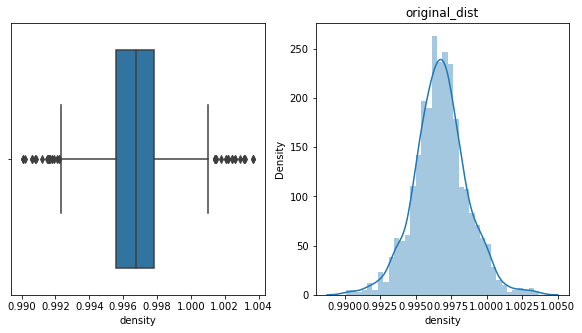

In [252]:
plts(df,"density")

In [253]:
outlier_det(df,"density")

(0.9910846773129555, 1.0024086810360109)

In [254]:
df[(df["density"]<0.99)|(df["density"]>1.002)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
364,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,1
366,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,1
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,1
480,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,0
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,0
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,0
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,0
559,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,0
564,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,0
608,10.1,0.650,0.37,5.1,0.110,11.0,65.0,1.00260,3.32,0.64,10.4,0


skewness: 0.19368349811284427


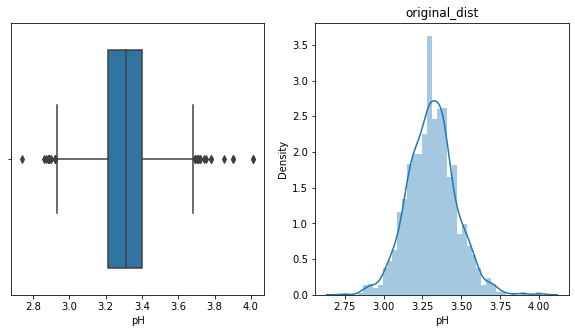

In [255]:
plts(df,"pH")

In [256]:
outlier_det(df,"pH")

(2.847953801036715, 3.774272590457971)

In [257]:
df[(df["pH"]<2.8)|(df["pH"]>3.7)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,0
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,0
95,4.7,0.600,0.17,2.30,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,0
151,9.2,0.520,1.00,3.40,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,0
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,0
588,5.0,0.420,0.24,2.00,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,1
695,5.1,0.470,0.02,1.30,0.034,18.0,44.0,0.99210,3.90,0.62,12.8,0
821,4.9,0.420,0.00,2.10,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,1
996,5.6,0.660,0.00,2.20,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,1
997,5.6,0.660,0.00,2.20,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,1


skewness: 2.4286723536602945


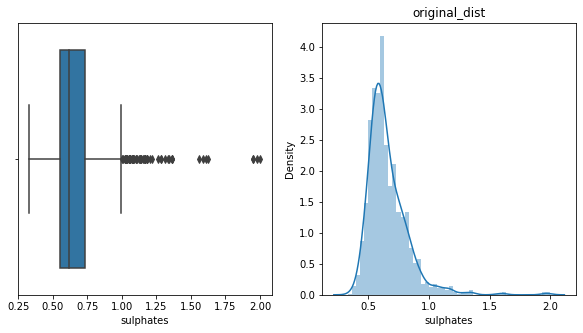

In [258]:
plts(df,"sulphates")

In [259]:
outlier_det(df,"sulphates")

(0.1496279042565628, 1.1666697817972214)

In [260]:
df[(df["sulphates"]<0.14)|(df["sulphates"]>1.16)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,0
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,0
43,8.1,0.660,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,0
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,0
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,0
88,9.3,0.390,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,0
91,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,0
92,8.6,0.490,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,0
106,7.8,0.410,0.68,1.7,0.467,18.0,69.0,0.99730,3.08,1.31,9.3,0
151,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,0


skewness: 0.8608288068888538


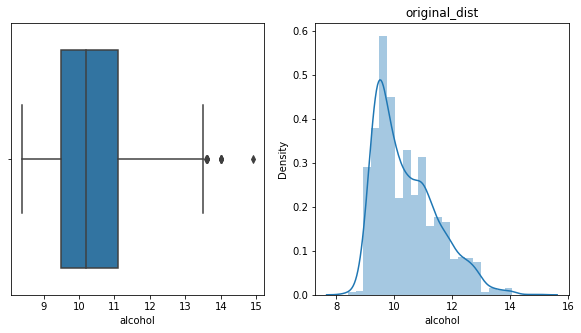

In [261]:
plts(df,"alcohol")

In [262]:
outlier_det(df,"alcohol")

(7.225980368904325, 13.619985859988681)

In [263]:
df[(df["alcohol"]<7.225)|(df["alcohol"]>13.61)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,0
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,0
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.0,0
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,1
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,0
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,1
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,1
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,0


Through above plots we can see that all the columns have outliers and when remove the outlier huge amount of data may be lost

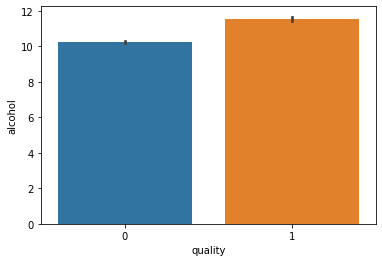

In [264]:
sns.barplot(x="quality",y="alcohol",data=df)
plt.show()

here we can see that increase the content of alcohol will increase the good quality.

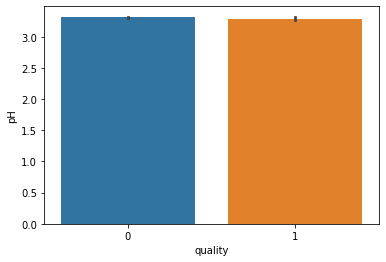

In [265]:
sns.barplot(x="quality",y="pH",data=df)
plt.show()

it is alomost same in each type of wine 

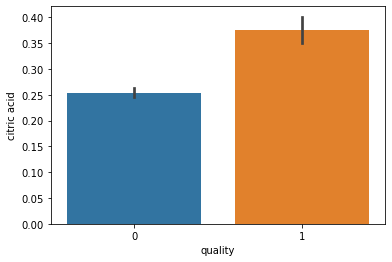

In [266]:
sns.barplot(x="quality",y="citric acid",data=df)
plt.show()

increase citric acid also increase good quality

# Resolving the issue of imbalace using over sampling method

In [267]:
df["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [268]:
count_class_0,count_class_1 = df.quality.value_counts()

# divided by class

df_class_0 = df[df["quality"]==0]
df_class_1 = df[df["quality"]==1]

In [269]:
df_class_0.shape

(1382, 12)

In [270]:
df_class_1.shape

(217, 12)

In [271]:
count_class_0,count_class_1

(1382, 217)

In [272]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)

quality_new = pd.concat([df_class_0,df_class_1_over],axis=0)
print("Random over-sampling:")

print(quality_new.quality.value_counts())

Random over-sampling:
1    1382
0    1382
Name: quality, dtype: int64


Now imbalance issue is solved,lets check:

In [273]:
x = quality_new.drop("quality",axis="columns")
y = quality_new["quality"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20,stratify=y)

When I specify stratify= y ,we can make sure that in our train and test class distribution is equal

In [274]:
y_test.value_counts()

1    415
0    415
Name: quality, dtype: int64

when I check the y_test value count and y_train value count it is uniform

# skewness

In [275]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

keeping =/-0.5 as the range for skewness.Here we can see that some of the columns have skewness .when we plot distplot before mentioned about that . when we remove the skewness in the all the features it will may be change the correlation value of dependend and indipendend feature,it will effect the model while predicting so need to check heatmap for correlation value after that we can remove skewness.Here are the columns which does not lie within this range:

--> quality - target variable,

--> citric acid - keeping kewness range,

--> density -  keeping kewness range,

--> pH -  keeping kewness range,

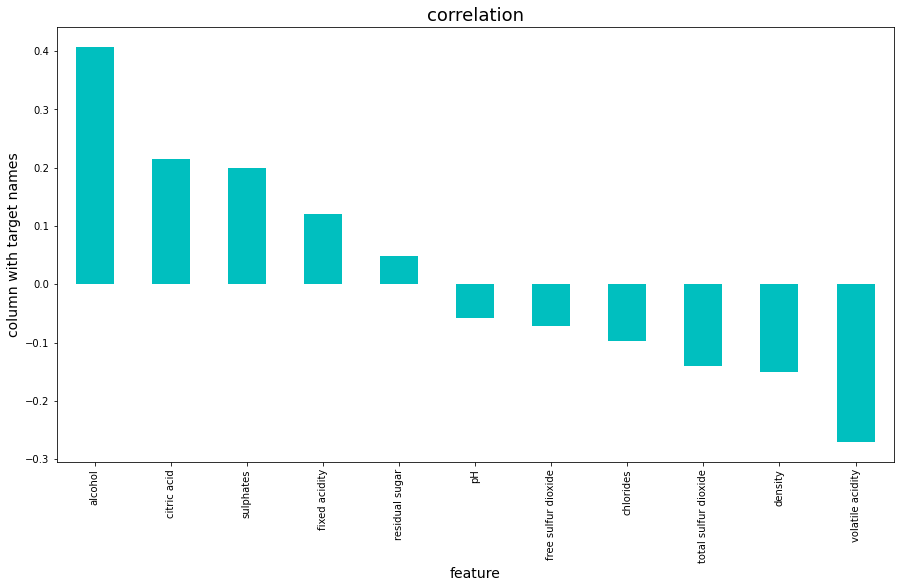

In [277]:
plt.figure(figsize=(15,8))
df.corr()["quality"].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Alcohol is highly correlated feature and residual sugar is low correlated feature ,its between 0 to 0.1.There are 6 columns have negative correlation.

In [278]:
def log_sk(df,feature_name):
    df[feature_name]=np.log(df[feature_name])
    print(df[feature_name].skew())

In [279]:
log_sk(df,"fixed acidity")

0.3939149942929756


In [280]:
log_sk(df,"residual sugar")

1.8068638195807207


In [281]:
log_sk(df,"residual sugar")

0.06622691512888981


In [282]:
df["volatile acidity"] = np.sqrt(df["volatile acidity"])
df["volatile acidity"].skew()

0.10835527504529936

In [283]:
df["chlorides"] = np.sqrt(df["chlorides"])
df["chlorides"].skew()

3.7087891263219466

In [284]:
log_sk(df,"chlorides")

1.7452154426856794


In [285]:
df["free sulfur dioxide"] = np.sqrt(df["free sulfur dioxide"])
df["free sulfur dioxide"].skew()

0.4833443103291927

In [286]:
log_sk(df,"total sulfur dioxide")

-0.07932282524494874


In [287]:
log_sk(df,"sulphates")

0.9218673620869906


In [288]:
df["sulphates"] = np.sqrt(df["sulphates"])
df["sulphates"].skew()

0.6723628480268549

In [289]:
log_sk(df,"alcohol")

0.661856479553696


In [291]:
# after removing the skewness
df.skew()

fixed acidity           0.393915
volatile acidity        0.108355
citric acid             0.318337
residual sugar          0.066227
chlorides               1.745215
free sulfur dioxide     0.483344
total sulfur dioxide   -0.079323
density                 0.071288
pH                      0.193683
sulphates               0.672363
alcohol                 0.661856
quality                 2.129363
dtype: float64

Almost columns skewness has removed except chlorides,sulphates and alchohol

# Feature selection

Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

In [292]:
best_features = SelectKBest(score_func=chi2, k=6)
fit = best_features.fit(x_train,y_train)

Apply selectkBest class to extract top 6 best features

In [293]:
selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':best_features.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
6,total sulfur dioxide,2172.631699
5,free sulfur dioxide,98.134920
10,alcohol,72.984401
2,citric acid,22.329618
1,volatile acidity,21.633663
0,fixed acidity,19.967256
3,residual sugar,8.559712
9,sulphates,8.054453
4,chlorides,1.117593
8,pH,0.052453


These are the features and thier score.Highest score value feature is total sulfur dioxide and least one is density.In this need to select best 6 features

In [294]:
x_train_chi = best_features.transform(x_train)
x_test_chi = best_features.transform(x_test)

In [295]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
265,11.8,0.26,0.52,1.8,0.071,6.0,10.0,0.99680,3.20,0.72,10.2
1111,5.4,0.42,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3
1450,7.2,0.37,0.32,2.0,0.062,15.0,28.0,0.99470,3.23,0.73,11.3
1451,7.8,0.32,0.44,2.7,0.104,8.0,17.0,0.99732,3.33,0.78,11.0
1405,7.7,0.28,0.30,2.0,0.062,18.0,34.0,0.99520,3.28,0.90,11.3


In [296]:
x_train_chi[0:3]

array([[11.8 ,  0.26,  0.52,  6.  , 10.  , 10.2 ],
       [ 5.4 ,  0.42,  0.27, 23.  , 55.  , 12.3 ],
       [ 7.2 ,  0.37,  0.32, 15.  , 28.  , 11.3 ]])

In [297]:
Lr = LogisticRegression()
Lr_model = Lr.fit(x_train_chi,y_train)

In [298]:
def generate_accuracy(model, x, y):
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    pred = model.predict(x)
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
    print(classification_report(y,pred))
    

function for evaluating accuracy and f1 score

In [299]:
generate_accuracy(Lr_model,x_test_chi,y_test)

Accuracy is:  0.7927710843373494
F1 score is:  0.8


              precision    recall  f1-score   support

           0       0.82      0.76      0.79       415
           1       0.77      0.83      0.80       415

    accuracy                           0.79       830
   macro avg       0.79      0.79      0.79       830
weighted avg       0.79      0.79      0.79       830



Here we can see that accuracy score and f1 score are same

In [300]:
scaling = StandardScaler()
x = scaling.fit_transform(x)

Scaling the x using StandardScaler

# Model Building

In [351]:
def eval(r):
    model=r
    model.fit(x_train_chi,y_train)
    pred = model.predict(x_test_chi)
    acc = accuracy_score(y_test,pred)
    f_score = f1_score(y_test,pred)
    print("Accuracy score is:",acc)
    print("F1 score is:",f_score)
    print(confusion_matrix(y_test,pred))
    print("\n")
    print(classification_report(y_test,pred))
    print("\n")
    plot_roc_curve(model,x_test_chi,y_test)
    plt.title("Receiver operating characteristics")
    plt.xlabel("False positive Rate")
    plt.ylabel("True positive Rate")
    plt.show()
    

Function for model test and train

Accuracy score is: 0.7927710843373494
F1 score is: 0.8
[[314 101]
 [ 71 344]]


              precision    recall  f1-score   support

           0       0.82      0.76      0.79       415
           1       0.77      0.83      0.80       415

    accuracy                           0.79       830
   macro avg       0.79      0.79      0.79       830
weighted avg       0.79      0.79      0.79       830





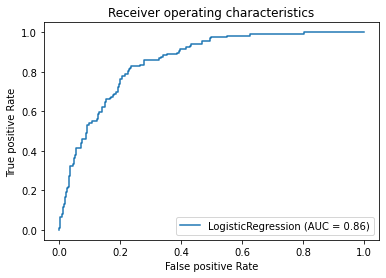

In [352]:
eval(LogisticRegression())

Accuracy score is: 0.9650602409638555
F1 score is: 0.9662398137369034
[[386  29]
 [  0 415]]


              precision    recall  f1-score   support

           0       1.00      0.93      0.96       415
           1       0.93      1.00      0.97       415

    accuracy                           0.97       830
   macro avg       0.97      0.97      0.97       830
weighted avg       0.97      0.97      0.97       830





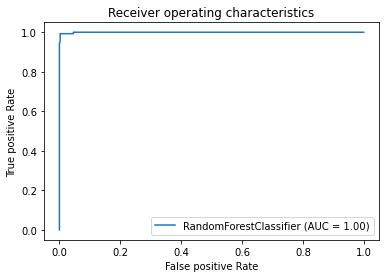

In [353]:
eval(RandomForestClassifier())

Accuracy score and f1 score are same

Accuracy score is: 0.8144578313253013
F1 score is: 0.8209302325581395
[[323  92]
 [ 62 353]]


              precision    recall  f1-score   support

           0       0.84      0.78      0.81       415
           1       0.79      0.85      0.82       415

    accuracy                           0.81       830
   macro avg       0.82      0.81      0.81       830
weighted avg       0.82      0.81      0.81       830





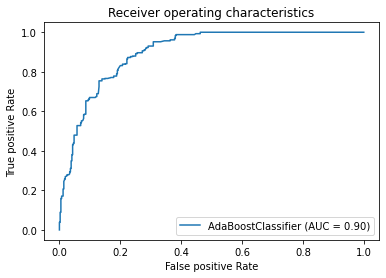

In [354]:
eval(AdaBoostClassifier())

Here also nearest score

Accuracy score is: 0.9433734939759036
F1 score is: 0.9464082098061574
[[368  47]
 [  0 415]]


              precision    recall  f1-score   support

           0       1.00      0.89      0.94       415
           1       0.90      1.00      0.95       415

    accuracy                           0.94       830
   macro avg       0.95      0.94      0.94       830
weighted avg       0.95      0.94      0.94       830





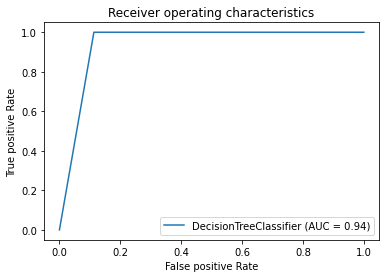

In [355]:
eval(DecisionTreeClassifier())

lets check cross validation for checking whether the model is  over fitting or under fitting

In [ ]:
Through above AUC curve we can conclude that randomforestclassifier is the best model.Its AUC =100%.

# cross_validation

In [334]:
scr = cross_val_score(LogisticRegression(),x,y,cv=3,scoring="f1")
print("cross validation score of LogisticRegression model:",scr.mean())

cross validation score of LogisticRegression model: 0.8002212956143059


Score of LogisticRegression increase from 79 to 80, it is nearest score so there is no over fitting and under fitting

In [335]:
scr = cross_val_score(RandomForestClassifier(),x,y,cv=3,scoring="f1")
print("cross validation score of RandomForestClassifier model:",scr.mean())

cross validation score of RandomForestClassifier model: 0.9488760802709454


f1_score is 96 decrease to 94.Here also not huge differents.

In [336]:
scr = cross_val_score(DecisionTreeClassifier(),x,y,cv=3,scoring="f1")
print("cross validation score of DecisionTreeClassifier model:",scr.mean())

cross validation score of DecisionTreeClassifier model: 0.9232728669121061


f1_score 94 decrease 92.same as the case of before

In [337]:
scr = cross_val_score(AdaBoostClassifier(),x,y,cv=3,scoring="f1")
print("cross validation score of AdaBoostClassifier model:",scr.mean())

cross validation score of AdaBoostClassifier model: 0.8503733374978842


f1_score is 83 and cross validation score also 85

Differents between f1 score (accuracy score) and cross validation score,which one is least differents it is the best model

LogisticRegression is my best model.let try hyper parameter for boosting the accuracy

# Hyper Parameter Tuning

 GridSearchCV

In [311]:
parameters = {"max_iter":np.arange(1,100),
             "multi_class":["auto","ovr","multinominal"]}

In [312]:
gcv=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [315]:
gcv.fit(x_train_chi,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'multi_class': ['auto', 'ovr', 'multinominal']})

In [316]:
gcv.best_params_

{'max_iter': 78, 'multi_class': 'auto'}

In [339]:
final_model=LogisticRegression(max_iter=78,multi_class="auto")
final_model.fit(x_train_chi,y_train)
pred=final_model.predict(x_test_chi)
acc=accuracy_score(y_test,pred)
f_score=f1_score(y_test,pred)
confusion=confusion_matrix(y_test,pred)
print(acc)
print(f_score)
print(confusion)

0.7879518072289157
0.7953488372093023
[[312 103]
 [ 73 342]]


before it is 79 and now also it is similar

# AUC ROC curve

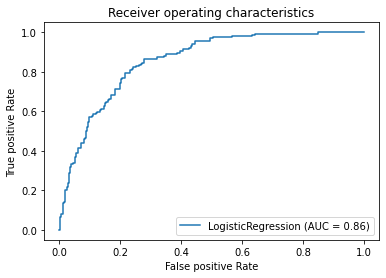

In [350]:

plot_roc_curve(final_model,x_test_chi,y_test)
plt.title("Receiver operating characteristics")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.show()

In [ ]:
It is a graphical representation of confusion metrix.Here we two axis true positive rate and false positive rate.Area under the curve shows the AUC. 

In [324]:
import joblib
joblib.dump(final_model,"red_wine.pkl")

['red_wine.pkl']

Above statistical calculation we can conclud that with the help of auc LogisticRegression is our best model.